In [1]:
import numpy as np

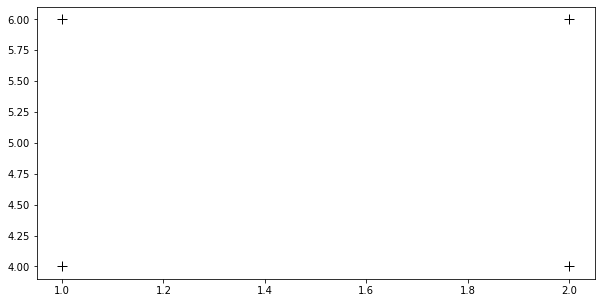

In [5]:
"""
Description

@author: Mattias Lazda
@collab: Jules Faucher, David Tucci

Feb 4, 2022
"""
import numpy as np
import matplotlib.pyplot as pl

# Set number of steps and time step
dt = 0.01
Nsteps = 100

# Setting up initial conditions
y_v = np.array([6,6,4,4])
x_v = np.array([1,2,1,2])
k_v = np.array([1,1,1,1])

# Setting up the plot
pl.ion()
fig, ax = pl.subplots(1,1, figsize=(10,5))
# Mark the initial positions of the vortices
p, = ax.plot(x_v, y_v, 'k+', markersize=10)

In [6]:
# draw the initial velocity streamline
ngrid = 10
Y,X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j]

In [9]:
vel_x = np.zeros(np.shape(X))
vel_y = np.zeros(np.shape(Y))

In [ ]:
r_mask = 3

for i in range(len(x_v)):
    
    # Get distance from 